# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from LifeCycleModel import LifeCycleModelModelClass

# Solve and simulate

In [2]:
model = LifeCycleModelModelClass(name='baseline')

In [3]:
par = model.par
sol = model.sol
sim = model.sim

In [4]:
model.solve()

 t = 54 solved in 3.9 secs
 t = 53 solved in 4.1 secs (post-decision: 4.1 secs)
 t = 52 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 51 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 50 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 49 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 48 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 47 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 46 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 45 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 44 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 43 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 42 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 41 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 40 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 39 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 38 solved in 0.1 secs (post-decision: 0.1 secs)
 t = 37 solved in 0.1 secs (post-decision: 0.1 secs)
 t = 36 solved in 0.1 secs (post-decision: 0.1 secs)
 t = 35 solved in 0

In [5]:
model.simulate()

model simulated in 5.8 secs


# Figures

## Income

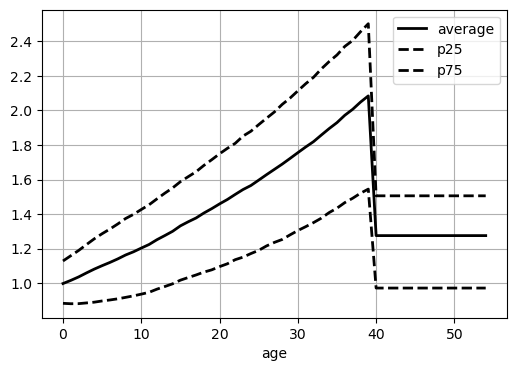

In [6]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(sim.y,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(sim.y,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(sim.y,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

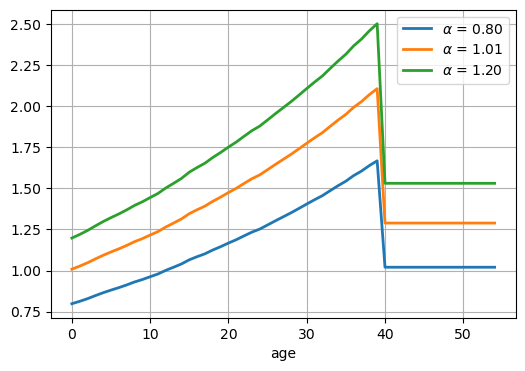

In [7]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
for ialpha in [0,par.Nalpha//2,par.Nalpha-1]:
    
    I = sim.alpha == par.grid_alpha[ialpha]
    ax.plot(age,np.mean(sim.y[:,I],axis=1),lw=2,label=f'$\\alpha$ = {par.grid_alpha[ialpha]:.2f}')
    
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

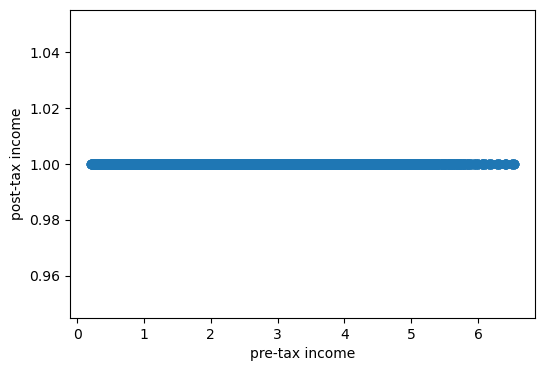

In [8]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.scatter(sim.y_pre[30,:],sim.y[30,:]/sim.y_pre[30,:])
ax.set_xlabel('pre-tax income')
ax.set_ylabel('post-tax income');

## Consumption

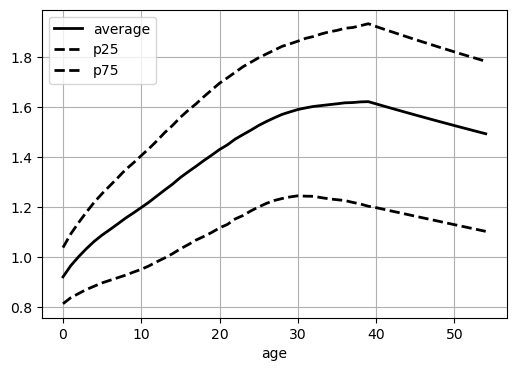

In [9]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(sim.c,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(sim.c,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(sim.c,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

## Relative to $\alpha$

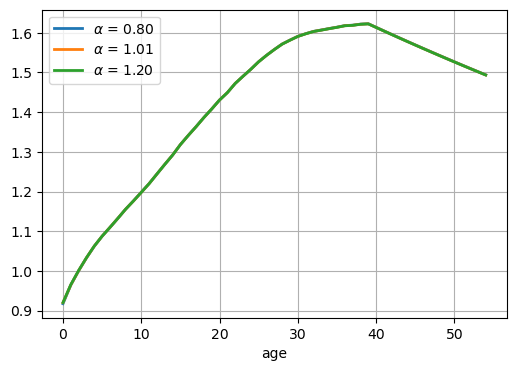

In [10]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)

for ialpha in [0,par.Nalpha//2,par.Nalpha-1]:
    
    alpha = par.grid_alpha[ialpha]
    I = sim.alpha == alpha
    
    ax.plot(age,np.mean(sim.c[:,I],axis=1)/alpha,lw=2,label=f'$\\alpha$ = {par.grid_alpha[ialpha]:.2f}')
    
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

## Savings

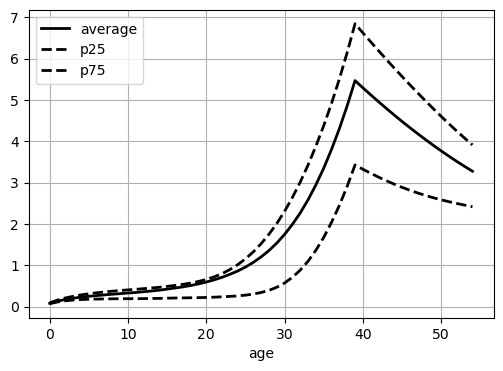

In [11]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(sim.a,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(sim.a,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(sim.a,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

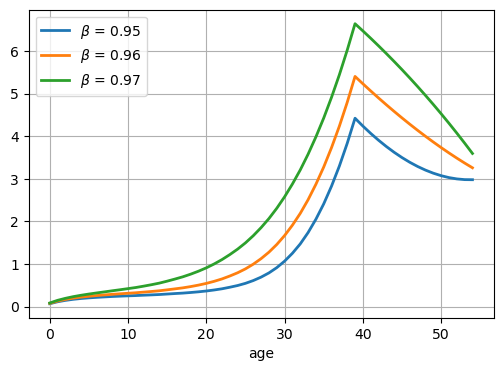

In [12]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
for ibeta in [0,par.Nbeta//2,par.Nbeta-1]:
    
    I = sim.beta == par.grid_beta[ibeta]
    ax.plot(age,np.mean(sim.a[:,I],axis=1),lw=2,label=f'$\\beta$ = {par.grid_beta[ibeta]:.2f}')
    
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

# MPC(P)[t]

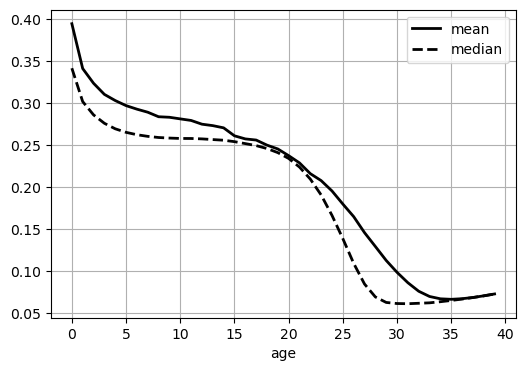

In [13]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPC[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPC[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

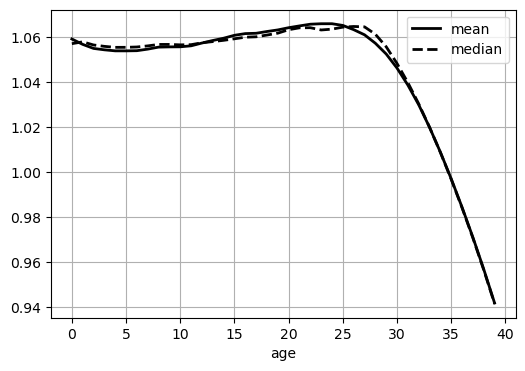

In [14]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPCP_perm[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPCP_perm[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

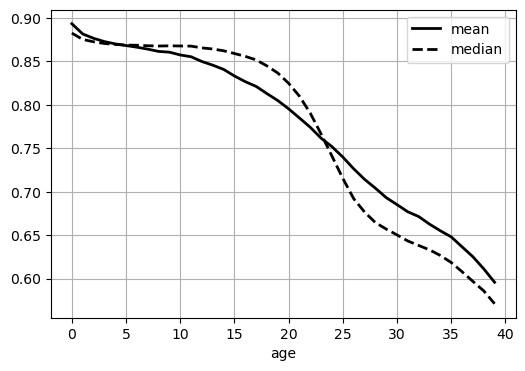

In [15]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPCP_pers[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPCP_pers[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

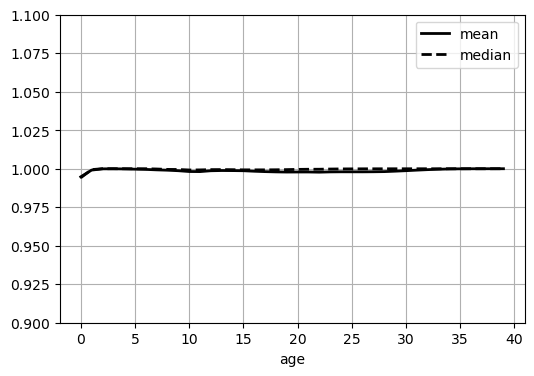

In [16]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPCP_scale[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPCP_scale[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age')
ax.set_ylim([0.9,1.1]);

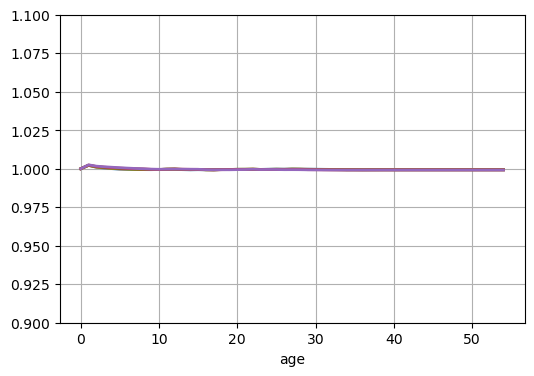

In [17]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)

for ibeta in range(par.Nbeta):
    beta = par.grid_beta[ibeta]
    I = sim.beta == beta
    ax.plot(age,np.cov(np.log(model.sim.alpha[I]),np.log(model.sim.c[1:par.T,I]))[0,:]/np.var(np.log(sim.alpha)),lw=2,label=f'$\\beta$ {beta:.2f}')
    
ax.grid(True)
ax.set_xlabel('age')
ax.set_ylim([0.9,1.1]);

In [18]:
def print_MPCP(model):
        
    phis = np.zeros((par.Nbeta,par.T))
    for ibeta in range(par.Nbeta):
        beta = par.grid_beta[ibeta]
        I = model.sim.beta == beta        
        phis[ibeta,:] = np.cov(np.log(model.sim.alpha[I]),np.log(model.sim.c[:,I]))[0,1:]/np.var(np.log(model.sim.alpha[I]))
        
    phi_uncond = np.cov(np.log(model.sim.alpha),np.log(model.sim.c[:,:]))[0,1:]/np.var(np.log(model.sim.alpha))    
    
    print(f'  phi: {np.mean(phis[:par.Tr,:]):.4f} [phi_uncond: {np.mean(phi_uncond):.4f}] [ini: {np.mean(phis[:,0]):.4f}]')
    print(f' perm: {np.mean(model.sim.MPCP_perm[:par.Tr,:]):.4f}')
    print(f' pers: {np.mean(model.sim.MPCP_pers[:par.Tr,:]):.4f}')
    print(f'scale: {np.mean(model.sim.MPCP_scale[:par.Tr,:]):.4f} [ini: {np.mean(model.sim.MPCP_scale[0,:]):.4f}]')
    
    print(f'cov(c_0,y_k)/cov(y_0,y_k):')
    for k in [1,2,3,4,5,10,20,30]:
        
        cov_ini_c = np.cov(np.log(model.sim.c[0,:]),np.log(model.sim.y[k,:]))[0,1]
        cov_ini_y = np.cov(np.log(model.sim.y[0,:]),np.log(model.sim.y[k,:]))[0,1]
    
        print(f' k = {k:2d}: {np.mean(cov_ini_c/cov_ini_y):.4f}')

In [19]:
print_MPCP(model)

  phi: 0.9997 [phi_uncond: 0.9997] [ini: 1.0074]
 perm: 1.0443
 pers: 0.7744
scale: 0.9987 [ini: 0.9947]
cov(c_0,y_k)/cov(y_0,y_k):
 k =  1: 0.9918
 k =  2: 0.9958
 k =  3: 0.9935
 k =  4: 0.9945
 k =  5: 0.9961
 k = 10: 0.9922
 k = 20: 0.9947
 k = 30: 0.9956


## Non-homothecity

In [20]:
model_non_homo = model.copy()
model_non_homo.par.do_print = False
model_non_homo.par.nu = 30.0
model_non_homo.par.aubar = 1.0
model_non_homo.par.sigma0 = 12.0
model_non_homo.par.aubar = 15.0
model_non_homo.par.omega = 0.95

In [21]:
model_non_homo.solve()

In [22]:
model_non_homo.simulate()

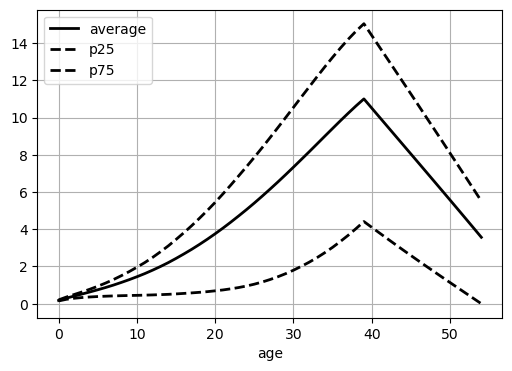

In [23]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(model_non_homo.sim.a,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(model_non_homo.sim.a,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(model_non_homo.sim.a,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

In [24]:
print_MPCP(model_non_homo)

  phi: 1.0062 [phi_uncond: 1.0062] [ini: 0.9303]
 perm: 0.6309
 pers: 0.4399
scale: 0.6398 [ini: 0.9162]
cov(c_0,y_k)/cov(y_0,y_k):
 k =  1: 0.9201
 k =  2: 0.9257
 k =  3: 0.9212
 k =  4: 0.9224
 k =  5: 0.9247
 k = 10: 0.9155
 k = 20: 0.9168
 k = 30: 0.9157


# Data sets

In [25]:
model.name = 'baseline'

In [26]:
models = []

for non_homo in [False,True]:
    for tau in [False,True]:
        for rho in [False,True]:
            for iota in [False,True]:
        
                model_ = model.copy()
                model_.name = 'baseline'
                
                model_.par.do_print = False

                if non_homo:
                    model_.name += '_non_homo'
                    model_.par.sigma0 = 12.0
                    model_.par.aubar = 15.0
                    model_.par.omega = 0.95

                if tau:
                    model_.name += '_tau'
                    model_.par.tau = 0.50           

                if rho:
                    model_.name += '_rho'
                    model_.par.rho = 1.0

                if iota:
                    model_.name += '_iota'
                    model_.par.iota = 10.0

                print(model_.name)
                if non_homo or tau or rho or iota:
                    
                    model_.allocate()
                    model_.solve()
                    model_.simulate()
                    model_.sol = None
                    
                else:
                    
                    model_ = model
                
                print_MPCP(model_)
                
                models.append(model_)
                print('')


baseline
  phi: 0.9997 [phi_uncond: 0.9997] [ini: 1.0074]
 perm: 1.0443
 pers: 0.7744
scale: 0.9987 [ini: 0.9947]
cov(c_0,y_k)/cov(y_0,y_k):
 k =  1: 0.9918
 k =  2: 0.9958
 k =  3: 0.9935
 k =  4: 0.9945
 k =  5: 0.9961
 k = 10: 0.9922
 k = 20: 0.9947
 k = 30: 0.9956

baseline_iota
  phi: 1.0000 [phi_uncond: 1.0093] [ini: 1.0023]
 perm: 1.0441
 pers: 0.7749
scale: 0.9972 [ini: 0.9937]
cov(c_0,y_k)/cov(y_0,y_k):
 k =  1: 0.9846
 k =  2: 0.9862
 k =  3: 0.9852
 k =  4: 0.9856
 k =  5: 0.9862
 k = 10: 0.9844
 k = 20: 0.9850
 k = 30: 0.9852

baseline_rho
  phi: 0.9995 [phi_uncond: 0.9995] [ini: 1.0079]
 perm: 1.0672
 pers: 0.8861
scale: 0.9993 [ini: 0.9963]
cov(c_0,y_k)/cov(y_0,y_k):
 k =  1: 1.0113
 k =  2: 1.0147
 k =  3: 1.0119
 k =  4: 1.0124
 k =  5: 1.0138
 k = 10: 1.0077
 k = 20: 1.0055
 k = 30: 1.0037

baseline_rho_iota
  phi: 0.9998 [phi_uncond: 1.0114] [ini: 1.0033]
 perm: 1.0679
 pers: 0.8865
scale: 0.9983 [ini: 0.9951]
cov(c_0,y_k)/cov(y_0,y_k):
 k =  1: 0.9928
 k =  2: 0.9939

baseline


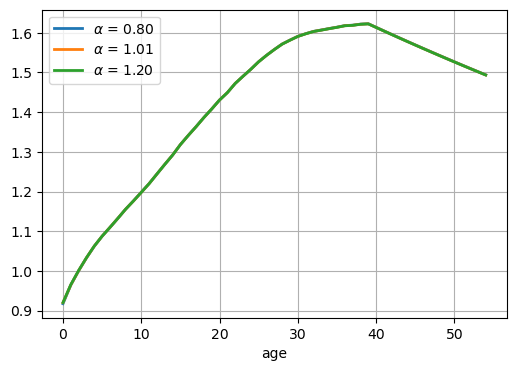

baseline_non_homo


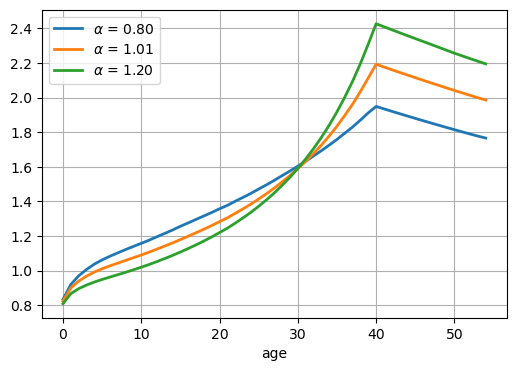

baseline_non_homo_rho


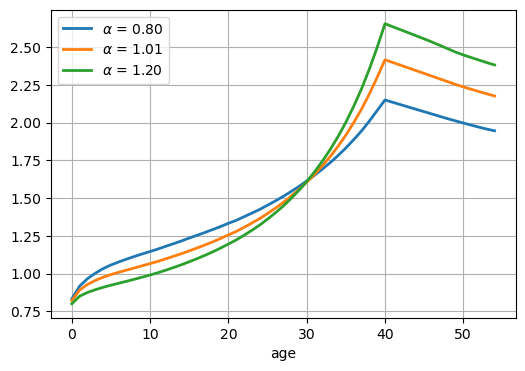

baseline_non_homo_tau


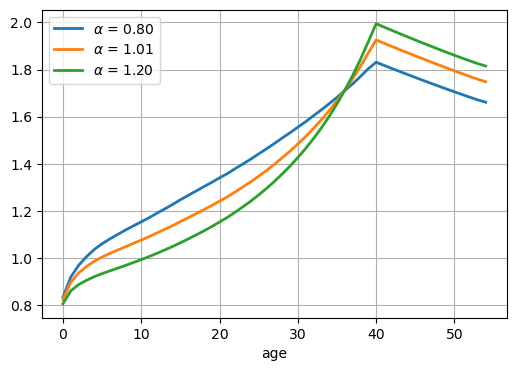

In [27]:
for model_ in models:
    
    if not model_.name in ['baseline','baseline_non_homo','baseline_non_homo_tau','baseline_non_homo_rho']: continue
    print(model_.name)

    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)
    age = np.arange(par.T)

    for ialpha in [0,par.Nalpha//2,par.Nalpha-1]:

        alpha = par.grid_alpha[ialpha]
        I = model_.sim.alpha == alpha

        ax.plot(age,np.mean(model_.sim.c[:,I],axis=1)/alpha,lw=2,label=f'$\\alpha$ = {par.grid_alpha[ialpha]:.2f}')

    ax.legend(frameon=True)
    ax.grid(True)
    ax.set_xlabel('age');
    
    plt.show()

# Export

In [28]:
import pandas as pd

In [29]:
for model_ in models:
    
    out = {}
    for k,v in model_.sim.__dict__.items():
        if k in ['alpha','beta','psi','xi','p','m']: continue
        out[k] = v[:par.Tr,::100].ravel()
        
    pd.DataFrame(out).to_stata(f'data/{model_.name}.dta')